<a href="https://colab.research.google.com/github/Latthaphon2545/ANN/blob/main/ANN_T02Generalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generalization

> ``It ain't what you don't know that gets you into trouble.

> It's what you know for sure that just ain't so.''

> ---Mark Twain

In [119]:
import numpy as np
from matplotlib import pyplot as plt

Polynomial function:

$$\hat{y} = f(x, w) =  \sum_{m=0}^D w_m \cdot x^m$$

Data

In [120]:
DX = [0.000, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1]
DY = [-0.028, 0.988, 1.387, 1.625, 1.089, 0.713, 0.328, 0.535, 1.112, 2.004]

Polynomial model

In [121]:
def fmodel(x, w):
    m = len(w)
    y = 0
    for i in range(m):
        y += w[i] * x**i

    return y

Training facilities

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
!pwd

/content


In [124]:
!ls ./drive/MyDrive/Y2023/IML/HandsOn/CurveFitting

ls: cannot access './drive/MyDrive/Y2023/IML/HandsOn/CurveFitting': No such file or directory


In [125]:
import sys
sys.path.append("./drive/MyDrive/Y2023/IML/HandsOn/CurveFitting") # my path
## Have it point to your path!

In [126]:
from shortcutpoly2 import super_train_poly as sctrain

Prep data

In [127]:
DatXY = np.array([DX, DY])

In [128]:
DatXY.shape

(2, 10)

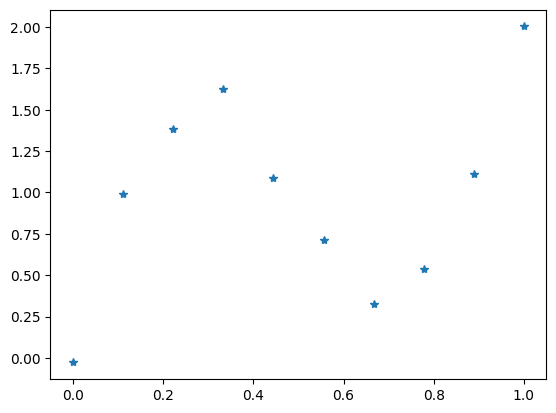

In [129]:
plt.plot(DX, DY, '*')

Train

In [130]:
# Choose the degree
# short_train_poly  does not need initial values. But, it only needs to know len(w) to determine the degree.
#w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # polynomial degree
w0 = [0, 0, 0, 0, 0] # polynomial degree


w =sctrain(w0, DatXY[0,:], DatXY[1,:])
print(w)

[ -0.07150842  14.17990899 -39.23723974  31.97464856  -4.78975712]


Let's see the trained model on data

In [131]:
# Check training error

D, N = DatXY.shape

ys = [fmodel(DatXY[0,i], w) for i in range(N)]

Training_error = np.sum(np.square(ys - DatXY[1,:]))

print('Training error = ', Training_error)

Training error =  0.09442147406390809


Let's check the plot

[-0.07150842265656507, 1.0620218465049585, 1.4808655134606643, 1.4212234229707985, 1.1018455672710754, 0.7209344918612858, 0.4704439980839651, 0.5131823610256963, 0.997938947936456, 2.056052273541673]
[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]


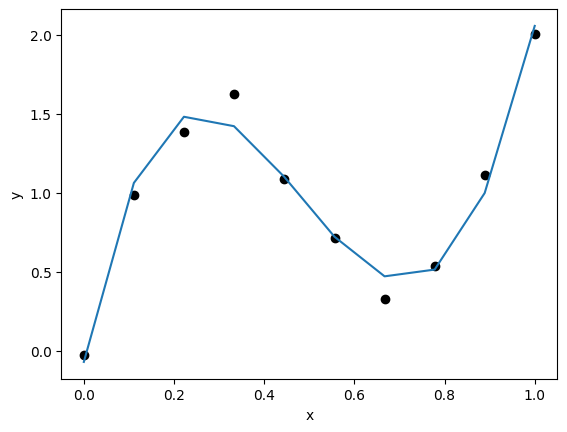

In [132]:
# Now, let's see how it does.

D, N = DatXY.shape

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
xs = [DatXY[0,i] for i in range(N)]
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
print(ys)
print(xs)
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Illustrative Example

Training error =  3.467603278195304e-07
[-0.028003400901252463, 0.9880290366148864, 1.3868899368202852, 1.625242969526917, 1.0886566837856435, 0.7133257339696115, 0.3277922299605507, 0.5350848931620931, 1.1119797745013784, 2.004002142683021]
[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]


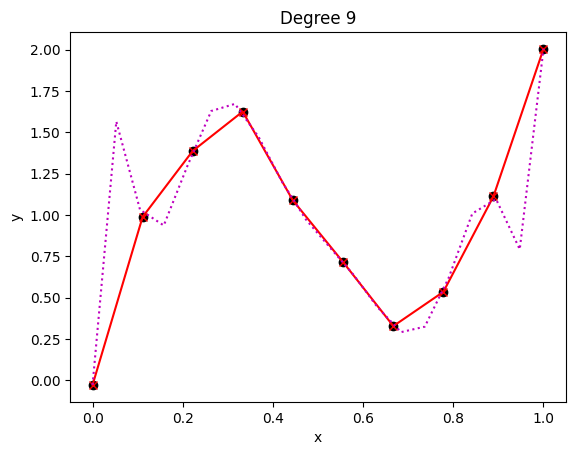

In [133]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Pick the degree ~ hyperparameter เลือกให้จรงตามจำนวน degree เช่น มี x^0 -> x^10 ให้เอา 10 degree

#w0 = [0, 0]  # Pick the degree ~ hyperparameter

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
xs = [DatXY[0,i] for i in range(N)]
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
print(ys)
print(xs)
plt.plot(xs, ys, 'rx-')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Degree " + str(len(w)-1))

# สมมุติว่ามันมีไม่ตรงกำจำนวน degree มันตามจุด แต่มันไม่ดี -> จารย์บอกมันไม่ทรงพลัง 5555555
# Overfitting -> Bad
# good predict for any data, including what they have not seen before
xs = np.linspace(0, 1, 20)
ys = [fmodel(x,w) for x in xs]
plt.plot(xs, ys, "m:")

plt.show()
# eiei


Is it that perfect?

PAUSE ... PAUSE ... PAUSE


#Reveal



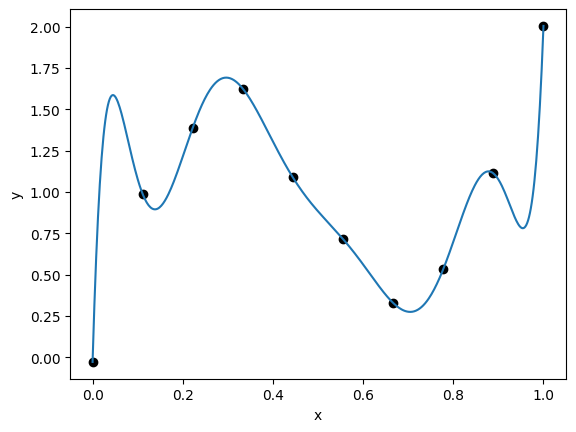

w = 
[-2.80034009e-02  9.30588292e+01 -1.86566353e+03  1.61716958e+04
 -7.39390367e+04  1.96484488e+05 -3.14733706e+05  2.99644950e+05
 -1.56099362e+05  3.42456080e+04]


In [134]:
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('w = ')
print(w)

The model fits training data perfectly.

But, it does not capture the underlying behavior of the relation.

This is called "**overfitting**".
The model loses **generalization**.
It fits too well to the training data
and it might not be able to predict well in general (i.e., data it has not seen).

> **Overfitting** is characterized by having small training error, but unproportionally large test error.

The best way to spot overfitting is to use **test dataset**---another dataset not used in training.

See [Model evaluation](#-Model-evaluation-/-model-selection).


#Model evaluation

Since we cannot rely on training data to evaluate our model.

We need **another set** of data to check model sanity.

We need a **Test Set**.

##Separating Data

In [135]:
# To better illustrate this, we will have more data

def gen_data(x):
        N = len(x)
        xp = x*10
        y = np.sin(xp) + 0.2*xp + 0.2*np.random.randn(N)

        return y

In [136]:
xs = np.linspace(0, 1, num=500)
ys = gen_data(xs)

In [137]:
# Save the data (Just in case)
DataX = xs.copy()
DataY = ys.copy()

Text(0, 0.5, 'y')

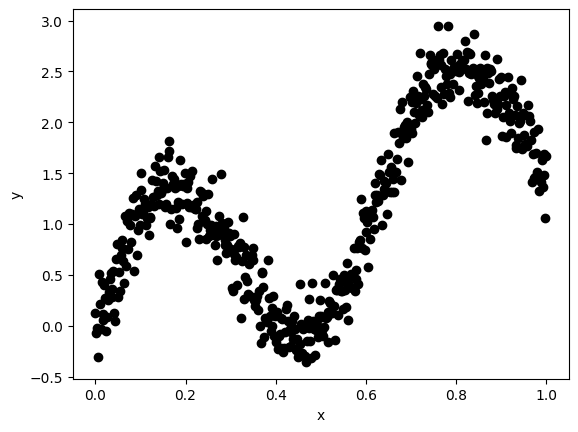

In [138]:
plt.plot(xs, ys, 'ko')
plt.xlabel('x'); plt.ylabel('y')

In [139]:
N = len(xs)
print('N = ', N)

N =  500


In [140]:
Ntrain = int(0.7 * N)
print('Ntrain = ', Ntrain)

Ntrain =  350


### Use IDs to separate

In [141]:
sids = np.random.permutation(np.arange(N))
trainIDs = sids[:Ntrain]
testIDs = sids[Ntrain:]

It's the id that is the key to this randomized separation.

In [142]:
print('train ids = ', trainIDs)
print('test ids = ', testIDs)

train ids =  [157 295 317 175 190 181 236 262 340 388   2 210   1 440  12 434  16 126
  82  33 381 455 359 171 347  80 246 398 484 134 288  46  90  50 277 195
 234 419 490   3 133 158 148  17 120 410 319 352 240 146 237 291 253  11
 492 159 366  26 174 478 118 212 301 218  86 272 130 334 136 230 439 248
 303 437 365 252 358 407  51 213 336 113 312 105 132 286 446 401 298 274
 447 256   4 348 184  13 268 216 462 300 475 323 404  61 392 179 209 495
 448  58 415 127 142 305 275  10 374 280 269 313 197 486 154 187 241  92
 403 473 155 420 266 397 491 263  55 309 326 245 318 457 202 451  45 189
  71 200 229 379 185  49 371 387 221 482 223  22   8 474 391 102 341 121
 424 115 224 128 416 400 349 331 168 264 227 460 431  63 315 343 138 207
 406 235 479 129  25 107 418 427 140 468 265 328  62 191  18  79  99  15
  53 214 204 125 182 166 285 436  47  74 239 293   0 222 444 101 139 489
 302 332 162 477 273 488 472 225 422  88 429   5 380 335 306  77 438 257
 414 201 267 433 432 441  41 289 304  

*We* can check (for this case).

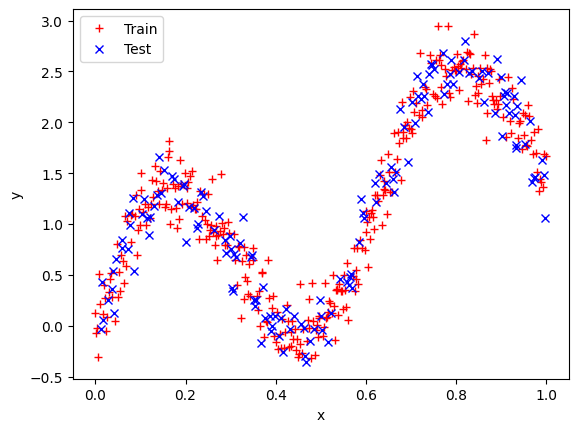

In [143]:
plt.plot(xs[trainIDs], ys[trainIDs], 'r+')
plt.plot(xs[testIDs], ys[testIDs], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

### Wrong way to separate data (I)

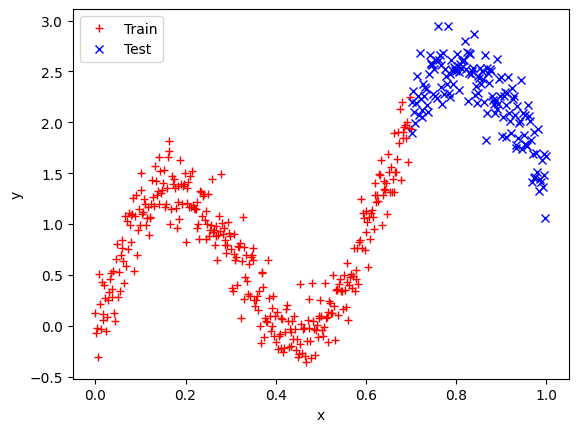

In [144]:
plt.plot(xs[:Ntrain], ys[:Ntrain], 'r+')
plt.plot(xs[Ntrain:], ys[Ntrain:], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

### Wrong way (II)

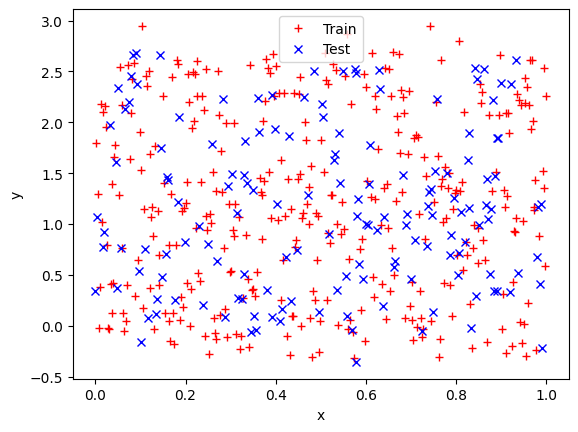

In [145]:
np.random.shuffle(xs)
np.random.shuffle(ys)

plt.plot(xs[:Ntrain], ys[:Ntrain], 'r+')
plt.plot(xs[Ntrain:], ys[Ntrain:], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

Let's take a look back at our data

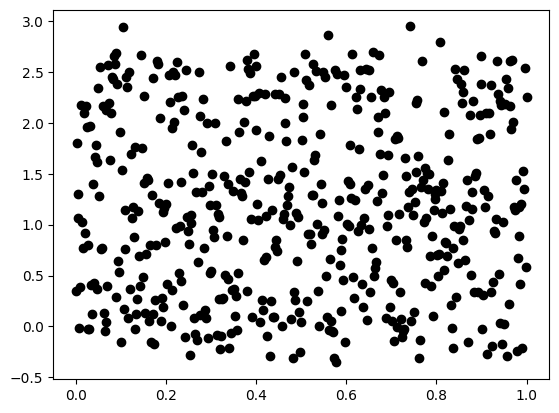

In [146]:
plt.plot(xs, ys, 'ko')

Ah!!!! They are all mixed up!!!


We're screwed!!

Hey! we have a copy, remember?

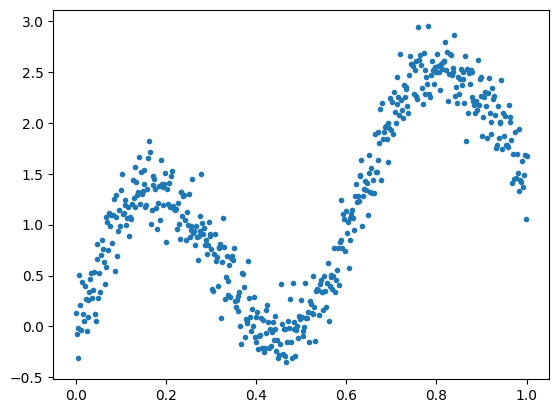

In [147]:
plt.plot(DataX, DataY, ".")

### Use a standard module to separate data


check out [sklearn split data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
print(DataX.shape)
print(DataY.shape)

(500,)
(500,)


In [150]:
#x_train, x_test, y_train, y_test = train_test_split(xs.reshape((-1,1)), ys.reshape((-1,1)), test_size=0.25, random_state=42)

# x_train, x_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.30)

In [151]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350,)
(350,)
(150,)
(150,)


Text(0, 0.5, 'y')

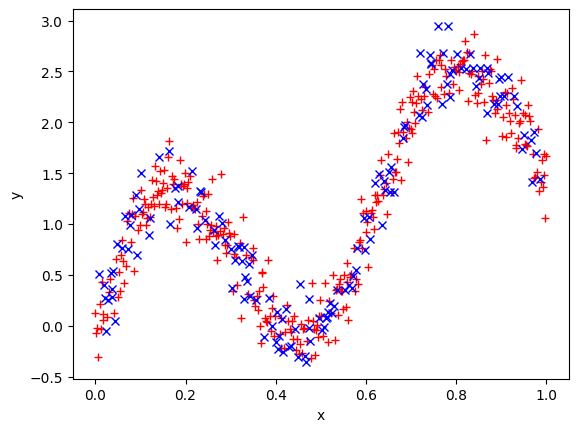

In [152]:
plt.plot(x_train, y_train, 'r+')
plt.plot(x_test, y_test, 'bx')
plt.xlabel('x'); plt.ylabel('y')

#Model selection

In [153]:
# Small set
smallx = np.random.uniform(low=0.0, high=1.0, size=20)
smally = gen_data(smallx)


x_train, x_test, y_train, y_test = train_test_split(smallx, smally, test_size=0.30, random_state=42)

# Large set
#x_train, x_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.30, random_state=42)



In [178]:
# Prepare training data
trainXY = np.c_[x_train, y_train].T
trainXY.shape

(2, 14)

In [155]:
# Prepara test data
testXY = np.c_[x_test, y_test].T
testXY.shape

(2, 6)

In [190]:
from numpy.ma.core import append
Ms = [1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 18, 19]

train_errs = []
test_errs = []

ws = []

Tran_mi_test = {}

for M in Ms:

  print('Degree ', M)
  # w0 = np.random.normal(0, 1, M).T.tolist()
  w0 = [0] * (M+1)

  # Train
  w =sctrain(w0, trainXY[0,:], trainXY[1,:])

  ws.append(w)

  # train eror
  D, N = trainXY.shape
  ys = np.array([fmodel(trainXY[0,i], w) for i in range(N)]) # predictions
  Training_error = np.sum(np.square(ys - trainXY[1,:]))
  print('* Training error = ', Training_error)
  train_errs.append(Training_error)

  ## Test error
  D, N = testXY.shape
  ys = np.array([fmodel(testXY[0,i], w) for i in range(N)])
  Test_error = np.sum(np.square(ys - testXY[1,:]))
  print('* Test error = ', Test_error)
  test_errs.append(Test_error)

  Tran_mi_test[M] = Training_error - Test_error

print((Tran_mi_test))

Degree  1
* Training error =  5.2254749671284895
* Test error =  1.8817079357812063
Degree  2
* Training error =  3.9814990929996323
* Test error =  0.190250448432618
Degree  3
* Training error =  1.681019804660365
* Test error =  1.3572886676344182
Degree  4
* Training error =  0.6091311070369942
* Test error =  0.4734220532019536
Degree  5
* Training error =  0.4265685338479141
* Test error =  0.5284645318445893
Degree  6
* Training error =  0.395293040386944
* Test error =  0.5349128961526236
Degree  7
* Training error =  0.36693967534110605
* Test error =  0.5705586737366465
Degree  10
* Training error =  0.2027513489771237
* Test error =  1.6299755872308872
Degree  13
* Training error =  0.16943615839768925
* Test error =  0.622766809629713
Degree  15
* Training error =  0.27609331480608096
* Test error =  3.234342291139854
Degree  18
* Training error =  0.018574148922406306
* Test error =  7.028485245477622
Degree  19
* Training error =  0.009023475229103057
* Test error =  23.92

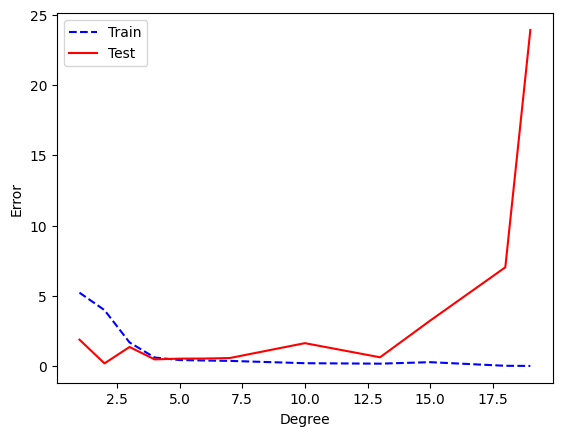

In [181]:
plt.plot(Ms, train_errs, 'b--')
plt.plot(Ms, test_errs, 'r')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
# ดูจรงที่เส้นสองเส้นตัดกันตรงนั้นคือ degree ที่เหมาะสม เพราะถ้ามันห่างกันมันจะ overfit
# จากรูปข้างล่างก็ประมาณ degree 3,4

In [158]:
print("ID:          ", ("\t{};"*len(Ms)).format(*range(len(Ms))))
print("Complexity M:", ("\t{};"*len(Ms)).format(*Ms))
print("Train error: ", ("\t{:0.2f};"*len(train_errs)).format(*train_errs))
print("Test error:  ", ("\t{:0.2f};"*len(test_errs)).format(*test_errs))


ID:           	0;	1;	2;	3;	4;	5;	6;	7;	8;	9;	10;	11;
Complexity M: 	1;	2;	3;	4;	5;	6;	7;	10;	13;	15;	18;	19;
Train error:  	7.48;	5.23;	3.98;	1.68;	0.61;	0.43;	0.40;	0.23;	0.18;	0.14;	0.01;	0.02;
Test error:   	0.98;	1.88;	0.19;	1.36;	0.47;	0.53;	0.53;	1.63;	0.74;	1.37;	15.64;	7.03;


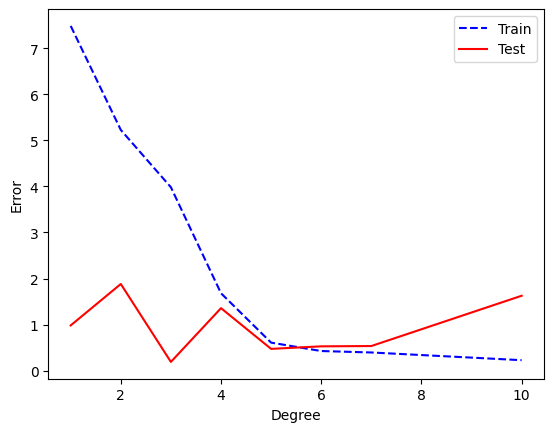

In [159]:
plt.plot(Ms[:-4], train_errs[:-4], 'b--')
plt.plot(Ms[:-4], test_errs[:-4], 'r')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])

To select a model, use test error as a guide.


We usually call test data using for selecting a model "**validation dataset**".

Then, we use another set, "test dataset" to do the final evaluation.

In [160]:
 chosenID = 4

 N = 50
 xs = np.linspace(0, 1, num=N)
 ys = np.array([fmodel(xs[i], ws[chosenID]) for i in range(N)])

(-3.0, 4.0)

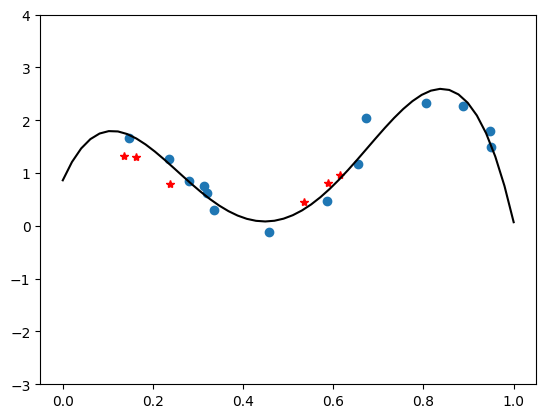

In [161]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'r*')
plt.plot(xs, ys, 'k-')

plt.ylim([-3, 4])

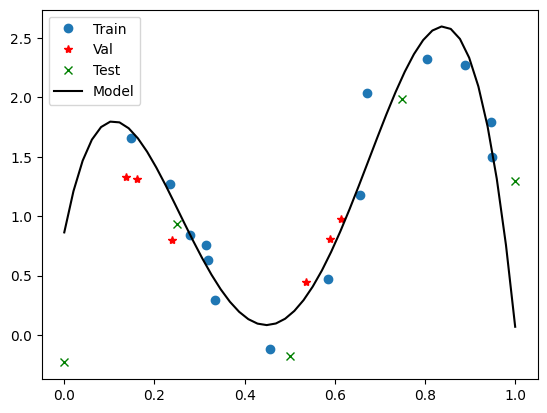

In [162]:
# Once we choose a mode, we should do a final evaluation.
# For convenience, we generate another set of data, i.e., the test set

testevalx = np.linspace(0, 1, num=5)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])

plt.plot(trainXY[0,:], trainXY[1,:], 'o') ## Train
plt.plot(testXY[0,:], testXY[1,:], 'r*') ## Validation
plt.plot(TestDatXY[0,:], TestDatXY[1,:], 'gx') ## Test

plt.plot(xs, ys, 'k-')
plt.legend(['Train', 'Val', 'Test', 'Model'])

In [163]:
D, N = TestDatXY.shape
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
test_error = np.sum(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: test error = ', test_error)


Final evaluation: test error =  2.877685347697181


#MSE vs SSE

In [164]:
N = 500

testevalx = np.linspace(0, 1, num=N)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
test_error = np.sum(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: test error = ', test_error)

Final evaluation: test error =  105.27593552605639


In practice, it is more convenient to use MSE, rather than SSE.

In [165]:
N = 500

testevalx = np.linspace(0, 1, num=N)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
mse = np.mean(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: mse = ', mse)

# MSE is less sensitive to a number of datapoints.

Final evaluation: mse =  0.21081531757853225


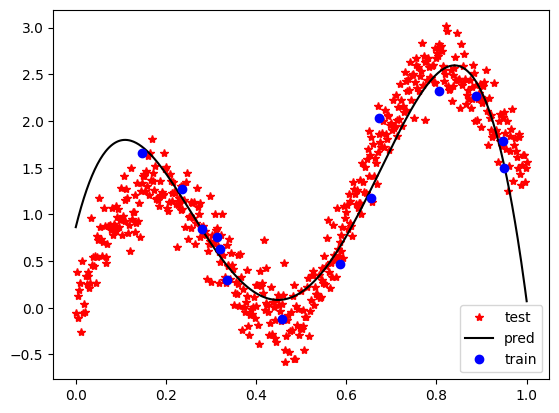

In [166]:
plt.plot(testevalx, testevaly, 'r*')
plt.plot(testevalx, yp, 'k-')
plt.plot(x_train, y_train, 'bo')
plt.legend(['test', 'pred', 'train'], loc='lower right')

Life is as good as it gets.

---

**The End.**

#Countermeasure to overfitting



*   Use a less complex model, e.g., lower degree
*   Have more data
*   Regularization   


##Use less complexity

Training error =  0.1031952902205021


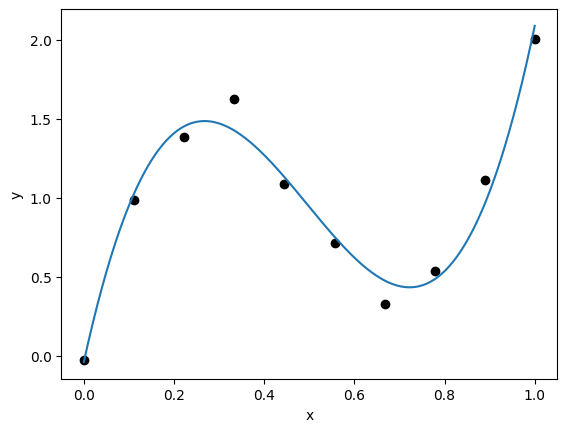

In [167]:
w0 = [0, 0, 0, 0]

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500; xs = np.linspace(0, 1, num=N); ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys); plt.xlabel('x'); plt.ylabel('y'); plt.show()

##Use more data

In general, acquisition of data is costly.

For illustration, let's generate data:

$$y = sin(x) + x + \epsilon$$

In [168]:
xs = np.linspace(0, 1, num=80)
ys = gen_data(xs)

DatXY = np.array([xs, ys])

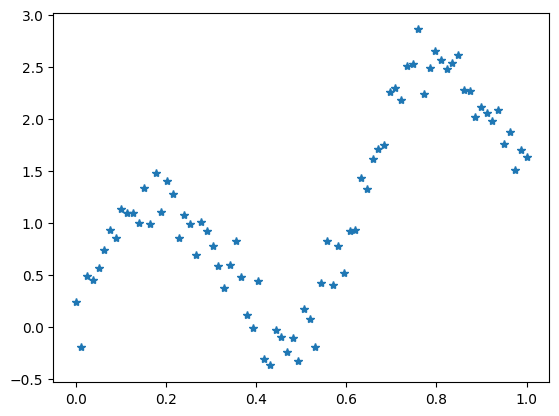

In [169]:
plt.plot(DatXY[0,:], DatXY[1,:], '*')

Training error =  2.513023027676686


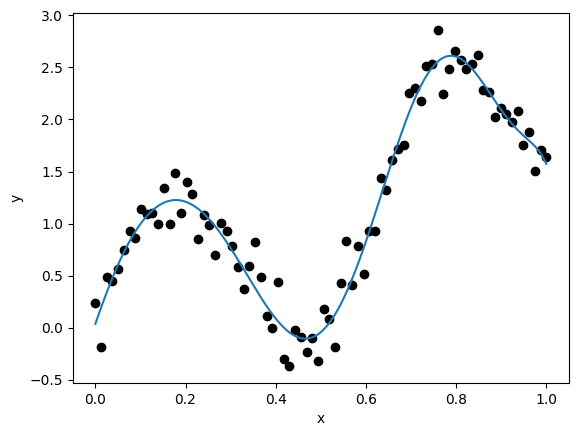

In [170]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##Do regularization

There are many **regularization** techniques.
But, here, we will see "**weight decay**".

loss:

$$E = \frac{1}{2}\sum_n (\hat{y} - y)^2 + \frac{\lambda}{2} \sum_m w_m^2$$

where $\lambda \geq 0$.

Lambda is called "**Lagrange parameter**".

In [171]:
def shortcut_train_polyW8DK(w, DataXY, lm=1):
    '''
    Y [1 x N] = w [1 x M] * Phi [M x N]

    Grad [M x 1] = Phi [M x N] * (Y' [N x 1] - T' [N x 1]) + lambda * w'
    Therefore,
        Grad    = Phi [M x N] * (Phi'*w' - T' [N x 1]) + lambda * w'
                = Phi*Phi'*w' - Phi*T' + lambda * w'.
    Thus, at Grad = 0, w' = Phi*T' * inv(Phi*Phi')
    '''
    assert DataXY.shape[0] == 2

    M = len(w)
    d, N = DataXY.shape

    X = DataXY[0,:]
    T = DataXY[1,:]


    # Compose Phi matrix [M x N]
    Phi = np.vstack((np.ones((1, N)),
            np.tile(X, (M-1, 1))
            ))

    Phi = np.cumprod(Phi, axis=0)

    A = np.dot(Phi, Phi.T) + lm * np.diag(np.ones(M))
    b = np.dot(Phi, T.T)

    w = np.linalg.solve(A, b)

    return w

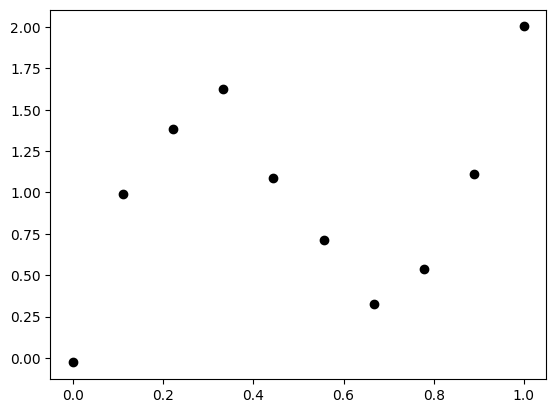

In [172]:
DX = [0.000, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1]
DY = [-0.028, 0.988, 1.387, 1.625, 1.089, 0.713, 0.328, 0.535, 1.112, 2.004]

DatXY = np.array([DX, DY])
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

In [173]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Train
w = shortcut_train_polyW8DK(w0, DatXY, lm=1e-12) # try lm: 0, 1e-13, 1e-12, 1e-6
w

array([-2.70633880e-02,  2.60656362e+01, -3.22663786e+02,  2.31944371e+03,
       -9.08529103e+03,  2.03829481e+04, -2.72695738e+04,  2.16123298e+04,
       -9.37681512e+03,  1.71558703e+03])

Training error =  0.01940764954196061


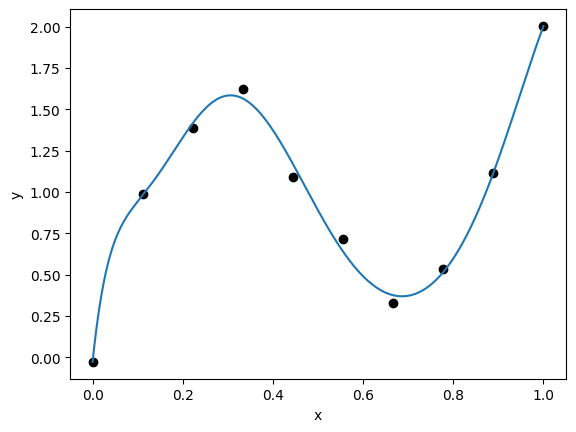

In [174]:
# "Test" (sort of)
D, N = DatXY.shape
ys = [ fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Ending note on evaluation metric

Another metric widely used for regression is R-square.

$$R^2 = 1 - \frac{\sum_n (\hat{y}_n - y_n)^2}{\sum_n (\bar{y} - y_n)^2 }$$

In [175]:
r2 = 1- np.sum( np.square(yp - TestDatXY[1,:]) )/np.sum( np.square( np.mean(TestDatXY[1,:]) - TestDatXY[1,:]) )
print('r2 =', r2)

r2 = 0.7291703021888041


## Standard R-square

In [176]:
from sklearn.metrics import r2_score

r2_score(TestDatXY[1,:], yp)

0.7291703021888041